<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling/blob/main/Pretrained_Model_and_Backbone_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive Connection and Packages Importation**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
import time

import numpy as np
import pandas as pd
import seaborn as sn

import torch
import torchvision
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torchvision import datasets, transforms
import torchvision.models as models 

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

device = "cuda" if torch.cuda.is_available() else "cpu"
device

Mounted at /content/drive


'cuda'

# **Pretrained CNN Model by ImageNet Challenge**  


---



ImageNet Challenge에서 활용된 Image Dataset을 통해 Pretrained된 CNN Model을 Import하여 Backbone Network로 활용할 수 있음 -- `torchvision.models`에 정의

## **ImageNet Data Label and Sample Image Preparation and Data PreProcessing**  
대표적인 대규모(Large-scale) Dataset으로 1000만개 이상의 이미지가 포함되어 있음, Amazon Mechanical Turk Service를 이용해 일일이 사람이 분류하였으며 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)로 잘 알려진 국제 대회에서 사용되는 Dataset

/content/drive/MyDrive/Colab Notebooks/data

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue'] 1001



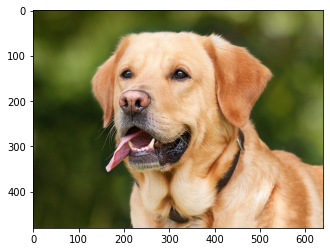

In [4]:
# Setting Directory path
root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "data")
print(root)
print()


# Define ImageNet Dataset Target Labels
imagenet_labels = np.array(open(os.path.join(root, "ImageNet_labels.txt")).read().splitlines())
print(imagenet_labels, len(imagenet_labels))
print()


# Plot Sample Image
sample_img = Image.open(os.path.join(root, "./dog.jpg"))
plt.imshow(sample_img)


# Data PreProcessing
PreProcessing = transforms.Compose([                                          # image data 전처리 과정 -> image에 randomness를 추가하여 Data Augmentation을 위한 작업 -> 학습에 용이
    transforms.Resize(256),                                                   # image 크기를 size값으로 변경
    transforms.CenterCrop(224),                                               # image의 가운데 부분을 size크기로 자름
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))        # Normalization 하는 이유 = Pretrained Model들이 Normalization하여 학습된 model들임
])                                                                            # Normalize 작업 후 -> (value - mean) / std로 변형
sample_img = PreProcessing(sample_img)

## **대표적인 Pretrained CNN Model**

### **① AlexNet --- ILSVRC 2012 Top-5 error(test) = 16.4%**  
CNN의 시대를 새롭게 연 대표적인 model, 최다 논문 피인용 횟수 기록, GPU를 이용한 CNN 학습, Activation function으로 ReLU 사용, Data Augmentation 활용 및 CNN에 Drop-out 기법을 도입한 Pretrained Model  
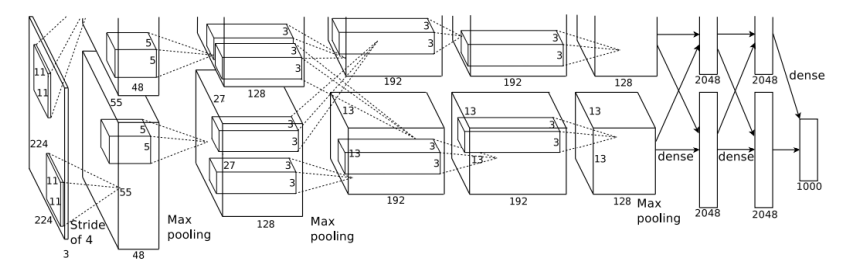

> ***cf) Data Augmentation***  
> *data의 label을 유지한 채 transform하여 data set의 크기를 키우는 기법, Overfitting 방지와 Generalization 성능 향상에 큰 기여, Image data의 경우 상하좌우 반전 및 회전, Noise 삽입, Random Crop(일부만 추출), Blur(흐리게 처리) 등이 있음*  
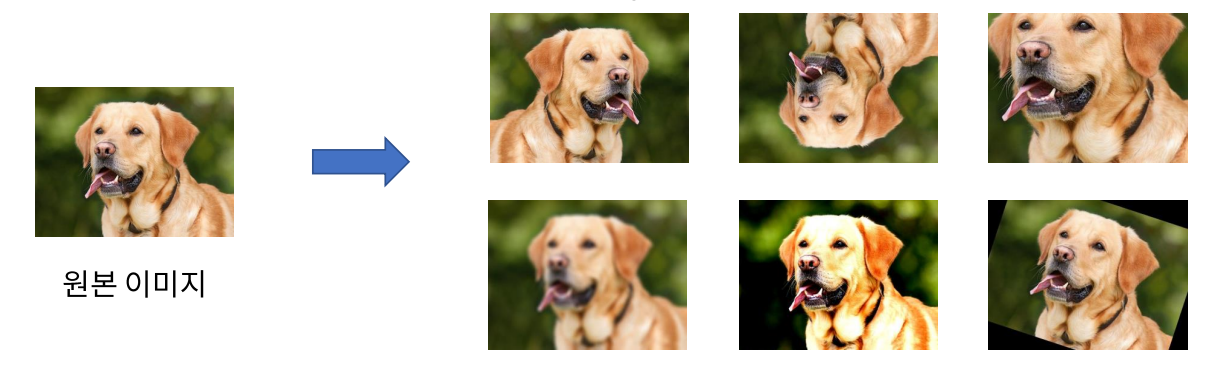

In [5]:
## ① AlexNet Importation and Prediction
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

alexnet_pred = alexnet(sample_img.unsqueeze(dim=0))
print(alexnet_pred.shape)
print()

alexnet_pred_class = np.array(torch.topk(alexnet_pred.flatten(), 5).indices)
print(imagenet_labels[alexnet_pred_class])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

torch.Size([1, 1000])

['curly-coated retriever' 'golden retriever' 'toy terrier'
 'German short-haired pointer' 'English foxhound']


### **② VGGNet --- ImageNet Classification Top 5 Error = 8.0%**  
Conv Layer부터 FC Layer까지 총 19개의 Layer가 존재, Conv Layer의 Filter가 3X3 spatial size + stride(1) + padding(1)을 기본적으로 사용하는 Pretrained Model  
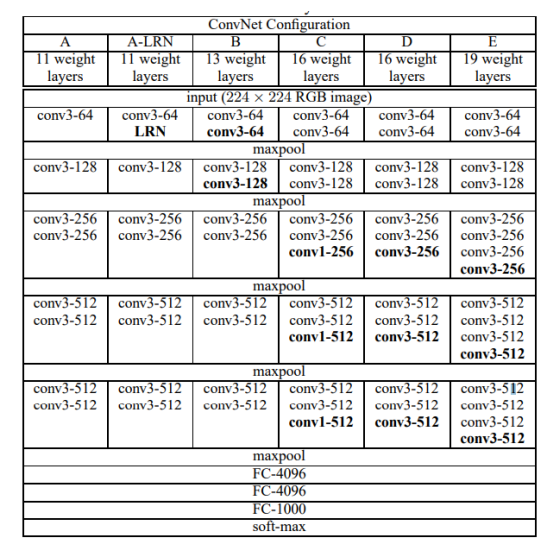

> ***cf) 3X3 Filter를 사용하는 이유***  
> *3X3 Conv layer를 여러개 쌓으면 큰 size의 Conv filter와 Receptive field가 같아지며 총 parameter의 갯수는 감소, ReLU가 많이 들어갈 수 있어서 표현력이 증가*  
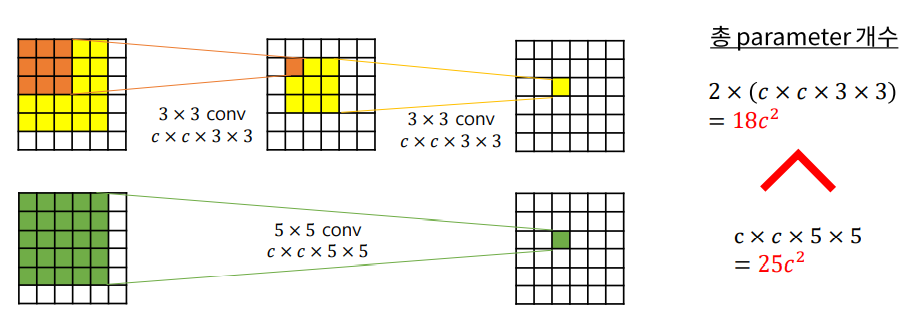

In [6]:
## ② VGGNet Importation and Prediction
vggnet16 = models.vgg16(pretrained=True)
vggnet16.eval()

vggnet16_pred = vggnet16(sample_img.unsqueeze(dim=0))
print(vggnet16_pred.shape)
print()

vggnet16_pred_class = np.array(torch.topk(vggnet16_pred.flatten(), 5).indices)
print(imagenet_labels[vggnet16_pred_class])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

torch.Size([1, 1000])

['golden retriever' 'curly-coated retriever' 'toy terrier' 'television'
 'soap dispenser']


### **③ ResNet --- ImageNet Classification Top 5 Error : 3.57%(인간의 경우 <5.0%)**  
Conv Layer가 많아짐에 따라 Gradient Vanishing/Exploding problem이 발생하여 layer의 갯수가 많다고 성능이 좋아지는 것이 아님을 알게 됨, Residual-Block을 활용한 Skip-Connection 기법 사용, 성능이 좋아 일반적으로 가장 많이 사용하는 Pretrained Model

> ***cf) Residual Block***  
> *Layer가 많은 Network들의 학습이 잘 안되는 것은 이전 layer에서만 입력을 받기 때문, Residual Block은 Skip-Connection을 이용하여 이전 layer의 feature를 직접 받아올 수 있음*  
`H(x) = F(x) + x, H(x) is Hypothesis output and F(x) is Residual`
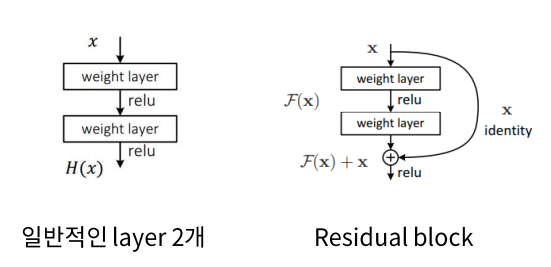  
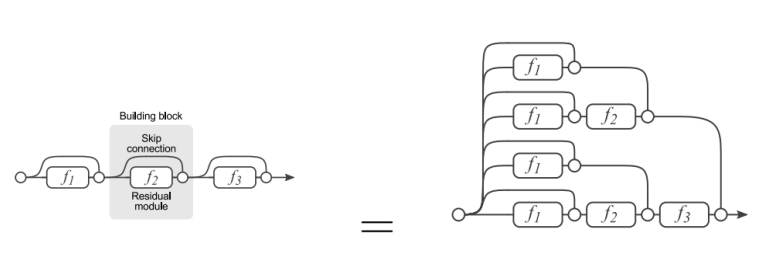

> ***cf) Bottle Neck***  
> 1X1 Conv Filter를 사용하여 학습 parameter 갯수와 연산량을 줄이는 구조, ResNet50 이상의 Model에서 주로 사용, 연산량이 작아 Feature map의 channel을 늘리거나 줄일때 사용, Spatial한 정보를 담고있지 않는 것이 특징  
> - 1X1 Covn Layer로 Feature map의 channel 축소
> - 축소된 channel에 3X3 Conv Layer로 Spatial한 Feature map 추출
> - 이후 다시 1X1 Conv Layer로 Feature map의 channel 원상 복구  
>  
> 
> 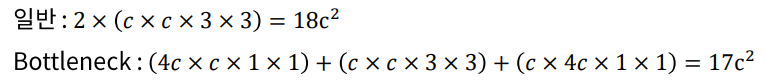

In [7]:
## ③ ResNet Importation and Prediction
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()

resnet50_pred = resnet50(sample_img.unsqueeze(dim=0))
print(resnet50_pred.shape)
print()

resnet50_pred_class = np.array(torch.topk(resnet50_pred.flatten(), 5).indices)
print(imagenet_labels[resnet50_pred_class])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

torch.Size([1, 1000])

['golden retriever' 'curly-coated retriever' 'television' 'toy terrier'
 'soap dispenser']
